## Plotting accuracy with different degrees of polynomial expansion

In [2]:
import numpy as np
from implementations import *
from cross_validation import *
from data_preprocessing import *
from proj1_helpers import *
import matplotlib.pyplot as plt
import math

print('loading data'+"\n")
DATA_TEST_PATH = '../data/train.csv'
y,tX,ids = load_csv_data(DATA_TEST_PATH)
print('data loaded')

tX=replace_aberrant_values(tX)
tX=kill_correlation(tX,0.95)
tX,mean,stdev= standardize(tX)
accs=np.empty((4,9))

degree = np.linspace(1,9,num=9,dtype=int)
for deg in degree:
    print(deg-1)

    acc, testloss, trainloss, weights = cross_validation_for_leastsquares(y, tX, deg)
    accs[:,deg-1]=acc
    

loading data

data loaded
0
test error = 0.340493767839
train error = 0.340401434674
accuracy =  0.744356 0.00187076027326


ValueError: cannot copy sequence with size 5 to array axis with dimension 4

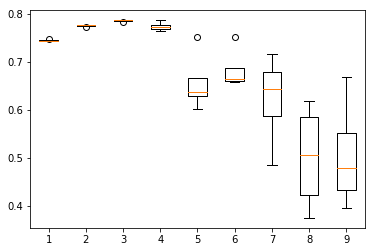

In [41]:
fig1, ax1 = plt.subplots()

ax1.boxplot(accs)
plt.show()


## Splitting data before polynomial expansion

In [4]:
print('loading data'+"\n")
DATA_TEST_PATH = '../data/train.csv'
y,tX,ids = load_csv_data(DATA_TEST_PATH)
print('data loaded')


maxdegree=13

accs=np.empty((3,5,maxdegree))
trainlosses=np.empty((3,5,maxdegree))

jet_tX = jet(tX)


means=[]
devs=[]
degree = np.linspace(1,maxdegree,num=maxdegree,dtype=int)
#cleans -999 and standardizes
for i in range(len(jet_tX)):
    #preprocess every train subset
    preprocessed_tX = preprocess_data(tX[jet_tX[i]])
    print(preprocessed_tX.shape)
    for deg in degree:
        print(deg-1)
        acc, testloss, trainloss, weights = cross_validation_for_leastsquares(y[jet_tX[i]], preprocessed_tX, deg)
        accs[i,:,deg-1]=acc
        trainlosses[i,:,deg-1]=trainloss


loading data

data loaded
(99913, 17)
0
test error = 0.272348016017
train error = 0.27212168776
accuracy =  0.816594935442 0.00258658797801
1
test error = 3.19252531803
train error = 0.252431442888
accuracy =  0.825663096787 0.00387797078406
2
test error = 1.10203186924
train error = 0.24443858267
accuracy =  0.829686718046 0.00299725927089
3
test error = 34179422.732
train error = 0.241024145617
accuracy =  0.832529276349 0.00364121607141
4
test error = 748330383738.0
train error = 0.238078578536
accuracy =  0.836933239916 0.00455234952621
5
test error = 1.01657528657e+15
train error = 4.20984557271
accuracy =  0.583385046542 0.243704825492
6
test error = 3.36472843183e+17
train error = 319.094075915
accuracy =  0.457291562406 0.217449783248
7
test error = 2.79342025529e+22
train error = 91273.2404945
accuracy =  0.582224001601 0.239092744157
8
test error = 1.64885789703e+27
train error = 270279.007293
accuracy =  0.751166049445 0.055124119422
9
test error = 1.63127698991e+30
train er

In [25]:
#we consider the global accuracy to be the mean of accuracies obtained in each dataset
accmeans=np.mean(accs,axis=0)
print(accs[0])


[[ 0.81387621  0.82188326  0.8052286   0.79389863  0.61478101  0.67339259
   0.41364401  0.25694611  0.25674594  0.48294499  0.51597406  0.50912803
   0.51165025]
 [ 0.81375611  0.82116262  0.82460565  0.82740812  0.82632717  0.7271599
   0.62362879  0.71226679  0.64957162  0.54071583  0.5050044   0.48702859
   0.48694851]
 [ 0.82224357  0.83001041  0.27876531  0.83593562  0.83433421  0.67014973
   0.71110577  0.2503403   0.25226199  0.56349588  0.55252622  0.47998238
   0.49039154]
 [ 0.81659861  0.8305709   0.83309312  0.83913844  0.84322204  0.82368484
   0.84029946  0.84382256  0.83813756  0.77267996  0.74025142  0.69076788
   0.64668909]]


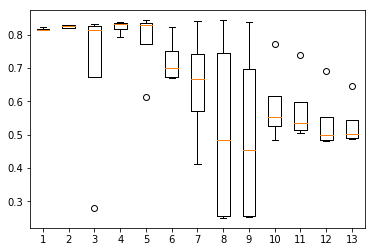

In [26]:
fig1, ax1 = plt.subplots()
ax1.boxplot(accs[0])
plt.show()


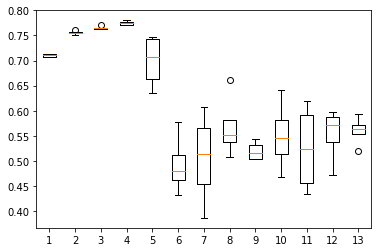

In [27]:
fig1, ax1 = plt.subplots()
ax1.boxplot(accs[1])
plt.show()

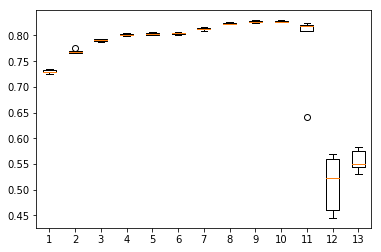

In [6]:
fig1, ax1 = plt.subplots()
ax1.boxplot(accs[2])
plt.show()

[ 1  2  3  4  5  6  7  8  9 10 11]
(5, 11)


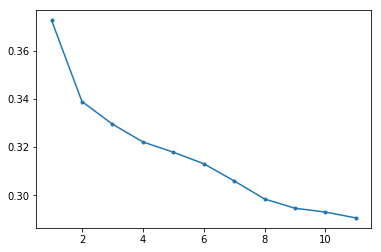

In [10]:
fig1, ax1 = plt.subplots()
degreeplt=degree[0:11]
print(degreeplt)
trainlossplt=trainlosses[1,:,0:11]
print(trainlossplt.shape)
ax1.plot(degreeplt,np.mean(trainlossplt,axis=0),marker=".")
plt.show()

## Plotting test error and train error for different values of lambda

In [1]:
import numpy as np
from implementations import *
from cross_validation import *
from data_preprocessing import *
from proj1_helpers import *
import matplotlib.pyplot as plt
import math

print('loading data'+"\n")
DATA_TEST_PATH = '../data/train.csv'
y,tX,ids = load_csv_data(DATA_TEST_PATH)
print('data loaded')

numpoints=9
kfold=5

accs=np.empty((3,kfold,numpoints))
trainlosses=np.empty((3,kfold,numpoints))
jet_tX = jet(tX)

means=[]
devs=[]

degree = 13
lambdas=np.logspace(-7,2,num=numpoints)
#cleans -999 and standardizes
for i in range(len(jet_tX)):
    
    preprocessed_tX = preprocess_data(tX[jet_tX[i]])
    
    for j in range(len(lambdas)):
        acc, testloss, trainloss, weights = cross_validation_ridge(y[jet_tX[i]], preprocessed_tX, lambdas[j], degree)
        accs[i,:,j]=acc
        trainlosses[i,:,j]=trainloss

print("done")

loading data

data loaded


KeyboardInterrupt: 

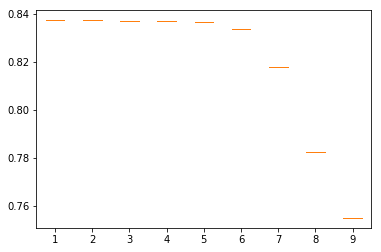

In [9]:
fig1, ax1 = plt.subplots()
ax1.boxplot(accs[0])
plt.show()

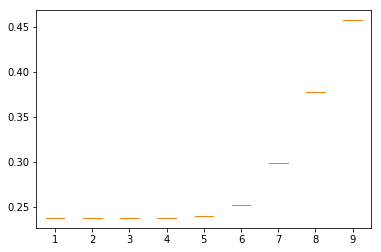

In [10]:
fig1, ax1 = plt.subplots()
ax1.boxplot(trainlosses[0])
plt.show()